# Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import json

# Gathering data

# Gather data from file on hand

In [3]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Extract the tweet_id from url

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv' , 'wb') as file:
    file.write(response.content)

# Getting Tweet Data From Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# convert txt file to data list
df_ls = []
with open('tweet-json copy') as file:
    for element in file:
        df_ls.append(json.loads(element))

In [10]:
print(df_ls[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [11]:
# creat dataframe
tweet_data = pd.DataFrame(df_ls, columns = ['id', 'retweet_count', 'favorite_count'])

In [12]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
# changing the name of id column
tweet_data = tweet_data.rename(columns ={'id':'tweet_id'})
tweet_data.to_csv('tweet_data.csv', index=False)

In [14]:
#saving the dataframe to csv file
d = pd.read_csv('tweet_data.csv')
d.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Asses Data

In [15]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
tw_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
tw_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13,10,None,None,None,None,None
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None


In [18]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
tw_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [20]:
tw_archive[tw_archive.rating_numerator<10].count()[0]

440

In [21]:
tw_archive[tw_archive.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [22]:
tw_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [23]:
tw_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Buddy           7
an              7
Daisy           7
Toby            7
Rusty           6
Oscar           6
Milo            6
Scout           6
Stanley         6
Jack            6
Jax             6
Leo             6
Dave            6
Koda            6
Bella           6
Sunny           5
             ... 
Rupert          1
Daniel          1
Donny           1
Lipton          1
Bobby           1
Jomathan        1
Willy           1
Storkson        1
Fwed            1
Dixie           1
Kaiya           1
Lance           1
Rumpole         1
Kara            1
Herb            1
Dunkin          1
Jangle          1
Fletcher        1
Apollo          1
Divine          1
Tessa           1
Carter          1
Grizz           1
Jeffrie         1
Chuck     

In [24]:
ti_predictions= pd.read_csv('image_predictions.tsv', sep='\t')
ti_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
ti_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
ti_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great_Pyrenees,0.729745,True,golden_retriever,0.237961,True,Labrador_retriever,0.020903,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
1115,724983749226668032,https://pbs.twimg.com/media/Cg-o3w0WgAANXdv.jpg,1,golden_retriever,0.675750,True,Great_Pyrenees,0.095168,True,cocker_spaniel,0.076043,True


In [27]:
ti_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [30]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
899,758474966123810816,1132,4227
624,795400264262053889,3323,11270
596,798694562394996736,5812,0
1587,686683045143953408,912,3072
1523,690400367696297985,509,2041
935,753298634498793472,6620,0
287,838476387338051585,5484,24664
2168,669351434509529089,207,474
1441,696744641916489729,1069,2293
1722,680085611152338944,10034,13959


# Quality:


# Tidiness
#the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.
#the data separated into 3 dataframe 

# Clean Data

# copy from dataframes

In [31]:
tw_archive_clean=tw_archive.copy()
ti_predictions_clean=ti_predictions.copy()
tweet_data_clean=tweet_data.copy()

In [32]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
ti_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
tweet_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# cleaning tidiness issue
# issue
  the separated 4 columns
# Define
merge all in one
# code

In [35]:
tw_archive_clean['dog_stage']= tw_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [36]:
tw_archive_clean= tw_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

# Test

In [47]:
tw_archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

# data separated into 3 dataframe
# Define
merge all in one
# code

In [37]:
tw_archive_clean= pd.merge(tw_archive_clean,tweet_data_clean, on='tweet_id', how='left')
tw_archive_clean= pd.merge(tw_archive_clean,ti_predictions_clean, on='tweet_id', how='left')

# Test

In [38]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

# cleaning quality issues
# there are 181 retweets as indicated by retweeted_status_id
# Define
delet rows and columns
# code

In [39]:
tw_archive_clean= tw_archive_clean[tw_archive_clean.retweeted_status_id.isnull()]
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [40]:
tw_archive_clean= tw_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'])

# Test

In [41]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

# invalid dogs names
# Define
convert invalid names to nan and extract the correct names
# code

In [42]:
tw_archive_clean.loc[tw_archive_clean.name.str.islower(),'name']='None'
tw_archive_clean.name=tw_archive_clean.name.replace('None',np.nan)
#tw_archive_clean.name=tw_archive_clean.name.replace(regex=['^[a-z]+','None'], value=np.nan)

In [43]:
sum(tw_archive_clean.name.isnull())

784

In [44]:
def function(text):
    txt_list= text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index= txt_list.index(word) + 1
            return txt_list[name_index]
        else :
            pass
    return np.nan

In [45]:
tw_archive_clean.name = np.where(tw_archive_clean.name.isnull(), tw_archive_clean.text.apply(function),tw_archive_clean.name)

# test

In [46]:
sum(tw_archive_clean.name.isnull())

761

# invalid tweet_id data type
# Define 
convert it to string
# code

In [47]:
tw_archive_clean.tweet_id=tw_archive_clean.tweet_id.astype(str)

# test

In [48]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

# invalid timestapm
# Define 
converting it to datetime
# code

In [49]:
tw_archive_clean.timestamp= pd.to_datetime(tw_archive_clean.timestamp)

# test

In [50]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

# missing photos
# Define 
delet this rows
# code

In [51]:
tw_archive_clean=tw_archive_clean[tw_archive_clean.jpg_url.notnull()]

# test

In [52]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

# used underscores instead of speaces in some columns
# Define 
change the underscores with speaces
# code

In [53]:
tw_archive_clean.p1 = tw_archive_clean.p1.str.replace('_',' ')
tw_archive_clean.p2 = tw_archive_clean.p2.str.replace('_',' ')
tw_archive_clean.p3 = tw_archive_clean.p3.str.replace('_',' ')

# test

In [55]:
tw_archive_clean.p1.head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [56]:
tw_archive_clean.p2.head()

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
Name: p2, dtype: object

In [57]:
tw_archive_clean.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

# The lower and upper letters
# Define
convert the lowercase letters to uppercase letters
# code

In [58]:
tw_archive_clean.p1 = tw_archive_clean.p1.str.title()
tw_archive_clean.p2 = tw_archive_clean.p2.str.title()
tw_archive_clean.p3 = tw_archive_clean.p3.str.title()

# test

In [59]:
tw_archive_clean.p1.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [60]:
tw_archive_clean.p2.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object

In [61]:
tw_archive_clean.p3.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object

# missing intries
# Define
delet rows without retweet_count intries
# test

In [62]:
sum(tw_archive_clean.retweet_count.isnull())

0

# some ratings are wrong.
# Rating_numerator and denominator should be one variable rating.
# Define
Change the rating_numerator and rating_denominator for oberservations with wrong value
Oberservations with tweet_id '810984652412424192'doesn't have a valid rating, so drop this row.
Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
Drop oberservations with extreme ratings.
# code


In [63]:
pd.set_option('display.max_colwidth', -1)
tw_archive_clean.loc[tw_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']].loc[tw_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [65]:

tw_archive_clean=tw_archive_clean[tw_archive_clean.tweet_id!='810984652412424192']
tw_archive_clean.loc[tw_archive_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
tw_archive_clean.loc[tw_archive_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
tw_archive_clean.loc[tw_archive_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
tw_archive_clean.loc[tw_archive_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
tw_archive_clean.loc[tw_archive_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


tw_archive_clean['rating']=tw_archive_clean.rating_numerator/tw_archive_clean.rating_denominator
tw_archive_clean=tw_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

tw_archive_clean.loc[tw_archive_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [66]:
tw_archive_clean.loc[tw_archive_clean.tweet_id=='786709082849828864','rating']=1.0
tw_archive_clean.loc[tw_archive_clean.tweet_id=='778027034220126208','rating']=1.1
tw_archive_clean.loc[tw_archive_clean.tweet_id=='680494726643068929','rating']=1.1
tw_archive_clean=tw_archive_clean[tw_archive_clean.rating<2]

In [67]:
tw_archive_clean.rating.sort_values()

315     0.0
1016    0.0
2091    0.1
2261    0.1
2338    0.1
1869    0.1
2246    0.2
2237    0.2
1761    0.2
2310    0.2
1764    0.2
2349    0.2
2079    0.2
1920    0.2
2326    0.2
1928    0.3
1938    0.3
765     0.3
1692    0.3
1898    0.3
2239    0.3
1947    0.3
1601    0.3
2136    0.3
1836    0.3
1478    0.3
2305    0.3
2202    0.3
2183    0.3
1314    0.3
       ... 
9       1.4
1053    1.4
184     1.4
369     1.4
209     1.4
199     1.4
149     1.4
268     1.4
758     1.4
533     1.4
436     1.4
56      1.4
141     1.4
631     1.4
164     1.4
41      1.4
395     1.4
490     1.4
76      1.4
1609    1.4
372     1.4
123     1.4
418     1.4
347     1.4
339     1.4
426     1.4
22      1.4
924     1.4
1068    1.4
788     1.4
Name: rating, Length: 1991, dtype: float64

# sorting data

In [71]:
tw_archive_clean.to_csv('twitter_archive_master.csv')

# Data analysis and visualization
# the pecentage of different dogs stages

In [72]:
stage_df= tw_archive_clean.dog_stage.value_counts()
stage_df

pupper     223
doggo      72 
puppo      28 
floofer    3  
Name: dog_stage, dtype: int64

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

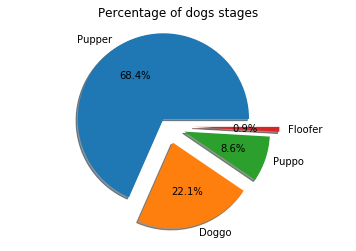

In [73]:
plt.pie(stage_df,
       labels = ['Pupper','Doggo','Puppo','Floofer'],
       autopct='%1.1f%%',
       shadow= True,
       explode= (0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of dogs stages')
plt.axis('equal')

# insights
1)Floofer has the lowest percentage

2)Pupper has the highest percentage

# Releation between retweet and favorite count

Text(0,0.5,'favorite count')

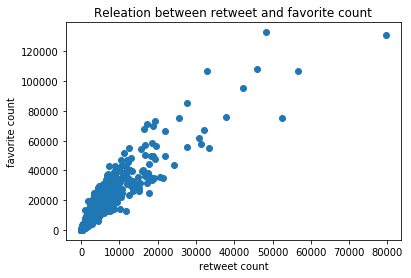

In [75]:
plt.scatter(tw_archive_clean.retweet_count,tw_archive_clean.favorite_count)
plt.title('Releation between retweet and favorite count')
plt.xlabel('retweet count')
plt.ylabel('favorite count')

# insights: 
it is appear that there is a linear relationship between tha retweet count and favrite count